<a href="https://colab.research.google.com/github/MarceloMouraF/interesting_codes/blob/main/Cruzar_Planilhas_com_CAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import geopandas as gpd

In [115]:
# Montar o acesso ao nosso Google drive, assim podemos salvar e acessar dados diretamente de lá
from google.colab import drive

drive.mount('/content/drive', force_remount=True) # force é para caso seja rodado de novo ele não dê erro
#aceitar o acesso ao drive

Mounted at /content/drive


In [2]:
#Pegar o estado do car

def pegar_uf(car):
    uf = car[:2]
    return uf

In [4]:
df_terra = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/PyGEO/Pratica/VEGA/Organizacao_Dados/Planilhas/Base ProTerra_unicos_v2.xlsx')

In [5]:
#aplica a função de pegar estado na coluna do car
df_terra['uf'] = df_terra['CAR'].apply(pegar_uf)

In [6]:
#retorna os valores únicos da coluna uf
df_terra['uf'].unique()

array(['MT', 'MS', 'AG'], dtype=object)

In [8]:
df_terra.head()

,Ano Safra,Contrato Master,Parceiro,Faz CNPJ,Faz CPF,Cidade do Parceiro,Faz Estado,UF,Cidade,CAR,uf
0,2023,1000197794,AGRICOLA ALVORADA S.A.,04854422000185,#,PRIMAVERA DO LESTE,BR/MT,Mato Grosso,PRIMAVERA DO LESTE,MT-5103858-6B44C556CC4F47F688437DF306C7A537,MT
1,2023,1000197794,AGRICOLA ALVORADA S.A.,04854422000185,#,PRIMAVERA DO LESTE,BR/MT,Mato Grosso,PRIMAVERA DO LESTE,MT-5103858-7266FE90D714412C8C3E20002A0421B9,MT
2,2023,1000250901,ALDUIR JOSE CENEDESE,#,34015876172,NOVA MUTUM,BR/MT,Mato Grosso,NOVA MUTUM,MT-5106224-E4C1BD92A8D54E5E85E0777D4E4F9AB7,MT
3,2023,1000242839,ROBERTO PEDRO TONIAL,#,22938699034,SONORA,BR/MS,Mato Grosso do Sul,SONORA,MS-5007935-D86FEF0A4E754898B76C4847D3DF9C24,MS
4,2023,1000199607,COOPERATIVA AGROPECUARIA E INDUSTRIAL CE,07572351000116,#,SORRISO,BR/MT,Mato Grosso,SORRISO,MT-5107925-B4BA61F0EFA44189ABBAE14D1ECA6FB5,MT


In [7]:
mt = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/PyGEO/Pratica/VEGA/Organizacao_Dados/Area_Plantada_Bunge/CAR_MT_com_grid.shp')
#sc = gpd.read_file(r'sicar\final\SC.shp')

In [ ]:
#concatena os dois shapes
#gdfzawn = pd.concat([sc,pr])

In [9]:
#Junta o shape com o excel a partir da coluna código
dffinal_t = pd.merge(df_terra.rename(columns={'CAR':'codigo'}),mt,how='left',on='codigo')

In [10]:
#Exibe as informações de cada coluna
dffinal_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 92
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Ano Safra           93 non-null     int64   
 1   Contrato Master     93 non-null     int64   
 2   Parceiro            93 non-null     object  
 3   Faz CNPJ            93 non-null     object  
 4   Faz CPF             93 non-null     object  
 5   Cidade do Parceiro  93 non-null     object  
 6   Faz Estado          93 non-null     object  
 7   UF                  93 non-null     object  
 8   Cidade              93 non-null     object  
 9   codigo              93 non-null     object  
 10  uf_x                93 non-null     object  
 11  situacao            87 non-null     object  
 12  condicao            87 non-null     object  
 13  uf_y                87 non-null     object  
 14  nome_munic          87 non-null     object  
 15  id_municip          87 non-null     float6

In [12]:
dffinal_t.head(3)

,Ano Safra,Contrato Master,Parceiro,Faz CNPJ,Faz CPF,Cidade do Parceiro,Faz Estado,UF,Cidade,codigo,...,condicao,uf_y,nome_munic,id_municip,modulo_fis,tipo,area_ha,cep,nome,geometry
0,2023,1000197794,AGRICOLA ALVORADA S.A.,04854422000185,#,PRIMAVERA DO LESTE,BR/MT,Mato Grosso,PRIMAVERA DO LESTE,MT-5103858-6B44C556CC4F47F688437DF306C7A537,...,Em análise,MT,Gaúcha do Norte,5103858.0,23.93,IRU,2151.7,78875000,BG125,"POLYGON ((-53.44720 -13.25552, -53.44664 -13.2..."
1,2023,1000197794,AGRICOLA ALVORADA S.A.,04854422000185,#,PRIMAVERA DO LESTE,BR/MT,Mato Grosso,PRIMAVERA DO LESTE,MT-5103858-7266FE90D714412C8C3E20002A0421B9,...,"Aguardando análise, não passível de revisão de...",MT,Gaúcha do Norte,5103858.0,2.71,IRU,243.6,78875000,BF126,"POLYGON ((-53.21894 -13.09053, -53.21511 -13.0..."
2,2023,1000250901,ALDUIR JOSE CENEDESE,#,34015876172,NOVA MUTUM,BR/MT,Mato Grosso,NOVA MUTUM,MT-5106224-E4C1BD92A8D54E5E85E0777D4E4F9AB7,...,"Aguardando análise, não passível de revisão de...",MT,Nova Mutum,5106224.0,82.79,IRU,8283.2,78450000,BG120,"POLYGON ((-55.96310 -13.37944, -55.96330 -13.3..."


In [15]:
dffinal_t.columns

Index(['Ano Safra', 'Contrato Master', 'Parceiro', 'Faz CNPJ', 'Faz CPF',
       'Cidade do Parceiro', 'Faz Estado', 'UF', 'Cidade', 'codigo', 'uf_x',
       'situacao', 'condicao', 'uf_y', 'nome_munic', 'id_municip',
       'modulo_fis', 'tipo', 'area_ha', 'cep', 'nome', 'geometry'],
      dtype='object')

In [16]:
#seleciona colunas específicas
dffinal_t = dffinal_t[['codigo','situacao','area_ha','Ano Safra','Contrato Master','Parceiro','Faz CNPJ','Faz CPF','Cidade do Parceiro','Cidade','tipo'
,'uf_x','nome','geometry']]
#renomeia a coluna
dffinal_t = dffinal_t.rename(columns={'uf_x':'uf'})

In [17]:
dffinal_t.head(3)

,codigo,situacao,area_ha,Ano Safra,Contrato Master,Parceiro,Faz CNPJ,Faz CPF,Cidade do Parceiro,Cidade,tipo,uf,nome,geometry
0,MT-5103858-6B44C556CC4F47F688437DF306C7A537,AT,2151.7,2023,1000197794,AGRICOLA ALVORADA S.A.,04854422000185,#,PRIMAVERA DO LESTE,PRIMAVERA DO LESTE,IRU,MT,BG125,"POLYGON ((-53.44720 -13.25552, -53.44664 -13.2..."
1,MT-5103858-7266FE90D714412C8C3E20002A0421B9,AT,243.6,2023,1000197794,AGRICOLA ALVORADA S.A.,04854422000185,#,PRIMAVERA DO LESTE,PRIMAVERA DO LESTE,IRU,MT,BF126,"POLYGON ((-53.21894 -13.09053, -53.21511 -13.0..."
2,MT-5106224-E4C1BD92A8D54E5E85E0777D4E4F9AB7,AT,8283.2,2023,1000250901,ALDUIR JOSE CENEDESE,#,34015876172,NOVA MUTUM,NOVA MUTUM,IRU,MT,BG120,"POLYGON ((-55.96310 -13.37944, -55.96330 -13.3..."


In [18]:
#transforma o dataframe em geodataframe
gdffinal_t = gpd.GeoDataFrame(dffinal_t,geometry='geometry',crs='epsg:4674')

In [ ]:
#Transforma coluna em string
#gdffinal['Prazo'] = gdffinal['Prazo'].astype('str')
#gdffinal['Recebimento'] = gdffinal['Recebimento'].astype('str')

In [20]:
gdffinal_t.shape

(93, 14)

In [21]:
gdffinal_t.to_file('/content/drive/MyDrive/Colab Notebooks/PyGEO/Pratica/VEGA/Organizacao_Dados/Area_Plantada_Bunge/Cruzamento Planilha CAR/BaseProTerra.shp')

<ipython-input-21-70ecdfb56c15>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdffinal_t.to_file('/content/drive/MyDrive/Colab Notebooks/PyGEO/Pratica/VEGA/Organizacao_Dados/Area_Plantada_Bunge/Cruzamento Planilha CAR/BaseProTerra.shp')


<Axes: >

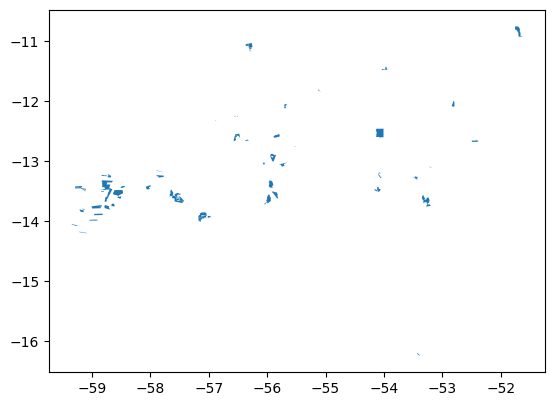

In [22]:
gdffinal_t.plot()

#*Agora fazer a mesma coisa para a outra base e, se der, ver se tem CAR's iguais!*

In [116]:
df_2bs = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/PyGEO/Pratica/VEGA/Organizacao_Dados/Planilhas/Base_2BSvs_limpa_v2.xlsx')

In [82]:
df_2bs.head(1)

,Controle,Nome do Fornecedor,Alteração- Produtor,Nome da Fazenda,Análise de Risco,Data Analise de Risco,CNPJ/CPF,Endereço / Localização (CAR),UF,Produto,Área Cultivada (ha),Quantidade de soja Potencial (t/ano),Comentarios
0,1,ADAIR VENDRUSCOLO,ADAIR VENDRUSCOLO,Fazenda Porta do Céu,APROVADO,2016,142420280-91,MT-5106224-39BA926191FE48A98E566C62F16D926C,MT,SOJA,1032.8389,3857.653292,NaN


In [43]:
#df_2bs['Endereço / Localização (CAR)'].dtype
# que merda de type é esse? = dtype('O')

array(['MT-5106224-39BA926191FE48A98E566C62F16D926C',
       'MT-5107065-FBDF698F39D740B1B456829489E23DEA',
       'MT-5107065-C5547CB906EA42C8905C6000B9F78836', ...,
       'MT-5102686-8B66FBFF1D3944BC837A0E5FE05D5539',
       'MT-5106752-50206030A6484B1392956AB4A72D5247',
       'MT-5106307-85BE7A19DC554612B82F23C912A6B8F0'], dtype=object)

In [117]:
# Criar uma nova coluna com os dados da coluna Endereço / Localização (CAR) em formato string
df_2bs['CAR']=df_2bs['Endereço / Localização (CAR)'].apply(str) # criando coluna CAR que será populada com Endereço / Localização (CAR)
                                                        #convertidos para valores string - texto
# OBRIGADO ChatGPT!

In [118]:
#
df_2bs['CAR'] = df_2bs['CAR'].astype(str).str.replace('.', '')

<ipython-input-118-515b0e493fa4>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_2bs['CAR'] = df_2bs['CAR'].astype(str).str.replace('.', '')


In [44]:
df_2bs.head(2)

,Controle,Nome do Fornecedor,Alteração- Produtor,Nome da Fazenda,Análise de Risco,Data Analise de Risco,CNPJ/CPF,Endereço / Localização (CAR),UF,Produto,Área Cultivada (ha),Quantidade de soja Potencial (t/ano),Comentarios,CAR,uf
0,1,ADAIR VENDRUSCOLO,ADAIR VENDRUSCOLO,Fazenda Porta do Céu,APROVADO,2016,142420280-91,MT-5106224-39BA926191FE48A98E566C62F16D926C,MT,SOJA,1032.8389,3857.653292,NaN,MT-5106224-39BA926191FE48A98E566C62F16D926C,MT
1,2,ADALBERTO BACKES,ADALBERTO BACKES,Fazenda São Matheus,APROVADO,2017,492767510-68,MT-5107065-FBDF698F39D740B1B456829489E23DEA,MT,SOJA,592.2200,2211.941700,NaN,MT-5107065-FBDF698F39D740B1B456829489E23DEA,MT


In [119]:
#aplica a função de pegar estado na coluna do car
df_2bs['uf'] = df_2bs['CAR'].apply(pegar_uf)

In [120]:
#retorna os valores únicos da coluna uf
df_2bs['uf'].unique()

array(['MT', '19', '81', '27', '13', '94', '10', '14', '56', '12', '31',
       '47', '80', '95', '96', '16', '17', '75', '23', '89', '25', '28',
       '42', '32', '41', '73', '87', '45', '43', '18', '77', '15', '11',
       '21', '63', '22', '78'], dtype=object)

In [ ]:
#mt = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/PyGEO/Pratica/VEGA/Organizacao_Dados/Area_Plantada_Bunge/CAR_MT_com_grid.shp')
#sc = gpd.read_file(r'sicar\final\SC.shp')

In [88]:
# Selecionar o que só é MT, tirar esses números estranhos
#df_2bs=df_2bs[df_2bs.uf=='MT']

In [89]:
df_2bs['uf'].unique()

array(['MT'], dtype=object)

In [121]:
df_2bs.shape

(1078, 15)

In [122]:
#Junta o shape com o excel a partir da coluna código
dffinal_bs = pd.merge(df_2bs.rename(columns={'CAR':'codigo'}),mt,how='left',on='codigo')

In [123]:
#Exibe as informações de cada coluna
dffinal_bs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1078 entries, 0 to 1077
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Controle                              1078 non-null   int64   
 1   Nome do Fornecedor                    1078 non-null   object  
 2   Alteração- Produtor                   1078 non-null   object  
 3   Nome da Fazenda                       1078 non-null   object  
 4   Data Analise de Risco                 1078 non-null   int64   
 5   CNPJ/CPF                              1078 non-null   object  
 6   Unnamed: 6                            0 non-null      float64 
 7   Endereço / Localização (CAR)          1078 non-null   object  
 8   UF                                    1078 non-null   object  
 9   Produto                               1078 non-null   object  
 10  Área Cultivada (ha)                   1061 non-null   float64 
 11  Quan

In [143]:
dffinal_bs.head(3)

,codigo,situacao,area_ha,Controle,Nome do Fornecedor,Alteração- Produtor,Nome da Fazenda,Data Analise de Risco,CNPJ/CPF,Produto,uf_x,nome,geometry
0,MT-5106224-39BA926191FE48A98E566C62F16D926C,AT,1340.4,1,ADAIR VENDRUSCOLO,ADAIR VENDRUSCOLO,Fazenda Porta do Céu,2016,142420280-91,SOJA,MT,BG118,"POLYGON ((-56.40307 -13.27481, -56.40306 -13.2..."
1,MT-5107065-FBDF698F39D740B1B456829489E23DEA,AT,692.9,2,ADALBERTO BACKES,ADALBERTO BACKES,Fazenda São Matheus,2017,492767510-68,SOJA,MT,BE128,"POLYGON ((-52.15425 -12.44207, -52.15674 -12.4..."
2,MT-5107065-C5547CB906EA42C8905C6000B9F78836,AT,484.1,3,Adalberto Backes,ADALBERTO BACKES,Fazenda Santo Antônio - Lotes 116 e 116 A,2017,492767510-68,SOJA,MT,BE128,"POLYGON ((-52.09464 -12.39115, -52.09523 -12.3..."


In [66]:
# Seleciona apenas as feições com geometrias não nulas
#df_bs_not_null=dffinal_bs[dffinal_bs['geometry'].notna()]


###### non-null
###### gdf_not_null = gdf[gdf['geometry'].notna()]
######gdf_not_null = gdf.dropna(subset=['geometry'])

In [125]:
dffinal_bs.columns

Index(['Controle', 'Nome do Fornecedor', 'Alteração- Produtor',
       'Nome da Fazenda', 'Data Analise de Risco', 'CNPJ/CPF', 'Unnamed: 6',
       'Endereço / Localização (CAR)', 'UF', 'Produto', 'Área Cultivada (ha)',
       'Quantidade de soja Potencial (t/ano)', 'Comentarios', 'codigo', 'uf_x',
       'situacao', 'condicao', 'uf_y', 'nome_munic', 'id_municip',
       'modulo_fis', 'tipo', 'area_ha', 'cep', 'nome', 'geometry'],
      dtype='object')

In [94]:
#dffinal_bs.shape

(1024, 26)

In [145]:
#seleciona colunas específicas
dffinal_bs = dffinal_bs[['codigo','situacao','area_ha','Controle','Nome do Fornecedor',
                         'Data Analise de Risco','CNPJ/CPF','Produto','uf_x','nome','geometry']]
#renomeia a coluna
dffinal_bs = dffinal_bs.rename(columns={'uf':'uf'})

In [152]:
dffinal_bs.columns

Index(['codigo', 'situacao', 'area_ha', 'Controle', 'Nome do Fornecedor',
       'Alteração- Produtor', 'Data Analise de Risco', 'CNPJ/CPF', 'Produto',
       'uf_x', 'nome', 'geometry'],
      dtype='object')

In [146]:
dffinal_bs.head(3)

,codigo,situacao,area_ha,Controle,Nome do Fornecedor,Alteração- Produtor,Data Analise de Risco,CNPJ/CPF,Produto,uf_x,nome,geometry
0,MT-5106224-39BA926191FE48A98E566C62F16D926C,AT,1340.4,1,ADAIR VENDRUSCOLO,ADAIR VENDRUSCOLO,2016,142420280-91,SOJA,MT,BG118,"POLYGON ((-56.40307 -13.27481, -56.40306 -13.2..."
1,MT-5107065-FBDF698F39D740B1B456829489E23DEA,AT,692.9,2,ADALBERTO BACKES,ADALBERTO BACKES,2017,492767510-68,SOJA,MT,BE128,"POLYGON ((-52.15425 -12.44207, -52.15674 -12.4..."
2,MT-5107065-C5547CB906EA42C8905C6000B9F78836,AT,484.1,3,Adalberto Backes,ADALBERTO BACKES,2017,492767510-68,SOJA,MT,BE128,"POLYGON ((-52.09464 -12.39115, -52.09523 -12.3..."


In [147]:
#transforma o dataframe em geodataframe
gdffinal_bs = gpd.GeoDataFrame(dffinal_bs,geometry='geometry',crs='epsg:4674')

In [153]:
# Deixar todas as colunas em string
for coluna in list(gdffinal_bs.columns):
  if coluna != 'geometry':
    gdffinal_bs[coluna]=gdffinal_bs[coluna].astype('str')

In [149]:
'''
tipos_dados = gdffinal_bs.dtypes
if 'object' in tipos_dados.values:
    bytes_columns = tipos_dados[tipos_dados == 'object'].index
    for col in bytes_columns:
        count= 0
        for dado in gdffinal_bs[col]:
            if str(type(dado)) == "<class 'bytes'>":
                #try:
                    print(col)
                    print(count)
                    print(dado)
                #except:
                    #pass
            count+=1
'''

In [150]:
gdffinal_bs.shape

(1078, 12)

In [155]:
gdffinal_bs.to_file('/content/drive/MyDrive/Colab Notebooks/PyGEO/Pratica/VEGA/Organizacao_Dados/Area_Plantada_Bunge/Cruzamento Planilha CAR/Base2BSvs.shp')

<ipython-input-155-cc063acd8e0d>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdffinal_bs.to_file('/content/drive/MyDrive/Colab Notebooks/PyGEO/Pratica/VEGA/Organizacao_Dados/Area_Plantada_Bunge/Cruzamento Planilha CAR/Base2BSvs.shp')


UnicodeDecodeError: ignored

Exception ignored in: 'fiona._env.log_error'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/fiona/collection.py", line 246, in __init__
    self.session.start(self, **kwargs)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 67: invalid continuation byte


UnicodeDecodeError: ignored

#*Verificar se tem CAR's iguais*
